## Задание 1

Предположите, с каким вероятностным законом распределен суммарный балл за экзамены. С помощью статистического теста подтвердите/опровергните это предположение:

Первый тест: критерий согласия Колмогорова (если распределение абсолютно непрерывное) или критерий согласия Пирсона (хи-квадрат, если распределение дискретное).




$$
\delta = \begin{cases}
H_0: F \sim N(\mu, \sigma), & \text{(нулевая гипотеза)} \\
H_1: F \nsim N(\mu, \sigma), & \text{(альтернативная гипотеза)}
\end{cases}
$$

$$
\rho(\vec{X}) = \sum\limits_{i=1}^{k} \frac{(v_i - n p_i)^2}{n p_i}
$$

$$
k \text{ — число интервалов (группировка значений выборки)}
$$

$$
v_i \text{ — наблюдаемое количество элементов выборки в } i\text{-ом интервале}
$$

$$
p_i \text{ — теоретическая вероятность попадания в } i\text{-ый интервал при } H_0
$$

$$
n \text{ — объём выборки}
$$

$$
\delta(\vec{X}) = \begin{cases}
H_0, & \text{если } \rho(\vec{X}) < C \\
H_1, & \text{если } \rho(\vec{X}) \geq C
\end{cases}
$$

$$
C \text{ выбирается так, чтобы } \alpha = \mathbb{P}(\chi^2_{k - s - 1} \geq C)
$$

$$
\chi^2_{k - s - 1} \text{ — распределение хи-квадрат с } (k - s - 1) \text{ степенями свободы}
$$

$$
s \text{ — число параметров, оценённых по выборке (например, } \mu \text{ и } \sigma \Rightarrow s = 2)
$$

$$
\text{Ошибка первого рода: приняли } H_1, \text{ хотя на самом деле верна } H_0 \quad (\text{вероятность } \alpha)
$$

$$
\text{Ошибка второго рода: приняли } H_0, \text{ хотя на самом деле верна } H_1 \quad (\text{вероятность } \beta)
$$

$$
p\text{-value} = \mathbb{P}(\chi^2_{k - s - 1} \geq \rho_{\text{наблюд}})
$$

$$
\text{Если } p\text{-value} < \alpha, \text{ то нулевая гипотеза } H_0 \text{ отвергается}
$$

$$
\text{Если } p\text{-value} \geq \alpha, \text{ то оснований отвергать } H_0 \text{ нет}
$$


10
Значение статистики хи-квадрат: 14.415948378926323
p value = 0.10827939596695013
Принимаем H0


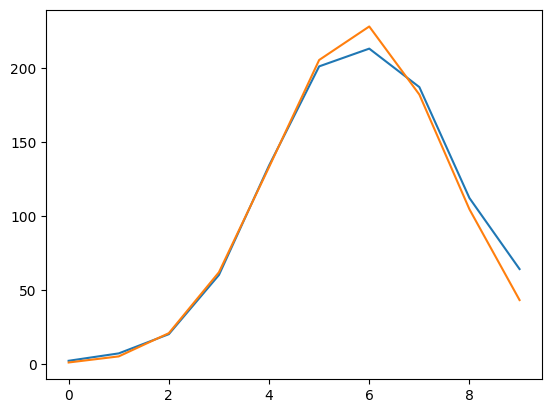

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("exams_dataset.csv")

# Уровень значимости
alpha = 0.05

# Суммарный балл каждого ученика по всем предметам
total_scores = data['math score'] + data['reading score'] + data['writing score']

# Оценка параметров предполагаемого нормального распределения
mu = total_scores.mean()     # выборочное среднее
sigma = total_scores.std()   # выборочное стандартное отклонение

# Число интервалов (по формуле Старджеса)
k = int(1 + 3.3 * np.log10(len(total_scores)))
print(f"Количество интервалов (k): {k}")

# Границы интервалов
bins = np.linspace(total_scores.min(), total_scores.max(), k + 1)

# Теоретические вероятности попадания в интервалы
# norm.cdf вычисляет значения функции распределения (интеграл от плотности)
p = norm.cdf(bins, mu, sigma)

# Ожидаемые частоты (по предполагаемому нормальному распределению)
expected_freqs = (p[1:] - p[:-1]) * len(total_scores)

# Наблюдаемые частоты (из данных)
observed_freqs, _ = np.histogram(total_scores, bins=bins)

# Статистика критерия Пирсона (хи-квадрат)
rho = np.sum((observed_freqs - expected_freqs) ** 2 / expected_freqs)

# p-value — вероятность получить такое или более экстремальное значение статистики при верной H0
df = k - 1 - 2  # уменьшение числа степеней свободы на число оцененных параметров (mu, sigma)
p_value = 1 - chi2.cdf(rho, df)

# Вывод результатов
print(f"\nЗначение статистики хи-квадрат: {rho:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value <= alpha:
    print("Результат значим: отвергаем H0, данные не распределены нормально.")
else:
    print("Нет оснований отвергнуть H0: данные могут быть распределены нормально.")

# Визуализация наблюдаемых и ожидаемых частот
plt.figure(figsize=(10, 5))
plt.plot(observed_freqs, label='Наблюдаемые частоты', marker='o')
plt.plot(expected_freqs, label='Ожидаемые частоты (N(μ,σ))', marker='x')
plt.xlabel("Интервалы")
plt.ylabel("Частота")
plt.title("Сравнение наблюдаемых и ожидаемых частот")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Проверить согласованность суммерного результата трех экзаменов с нормальным законом любым критерием, используя готовую реализацию.
#### Формализация гипотез:

- Нулевая гипотеза ($H_0$): Суммарный результат трех экзаменов имеет нормальное распределение $N(\mu, \sigma)$.
- Альтернативная гипотеза ($H_1$): Суммарный результат трех экзаменов не имеет нормального распределения $N(\mu, \sigma)$.

#### Критерий Колмогорова-Смирнова:

$$\delta = \begin{cases} H_0, & D_n < C \\ H_1, & D_n \geq C \end{cases}$$

Где $D_n$ - статистика Колмогорова-Смирнова, которая измеряет максимальное отклонение эмпирической функции распределения от теоретической функции распределения.

Для проверки гипотезы нужно найти критическое значение $C$ и сравнить со статистикой $D_n$.

Статистика Колмогорова-Смирнова: 0.029524358410176865
p-value: 0.3413301182335098
Принимаем нулевую гипотезу: данные подчиняются нормальному распределению


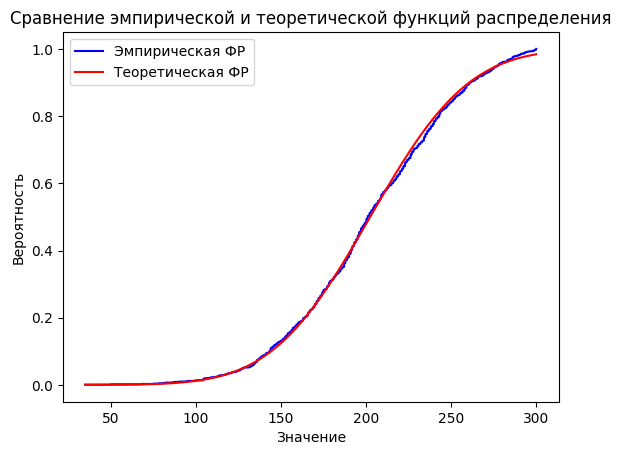

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kstest, norm

data = pd.read_csv("exams_dataset.csv")

total_score = data['math score'] + data['reading score'] + data['writing score']

mu, sigma = norm.fit(total_score)

kstest_result = kstest(total_score, 'norm', args=(mu, sigma), alternative = 'two-sided')

print("Статистика Колмогорова-Смирнова:", kstest_result.statistic)
print("p-value:", kstest_result.pvalue)

alpha = 0.05

# Проверка статистической значимости
if kstest_result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: данные не подчиняются нормальному распределению")
else:
    print("Принимаем нулевую гипотезу: данные подчиняются нормальному распределению")

ecdf = lambda x: np.sum(total_score <= x) / len(total_score)  # Эмпирическая функция распределения
x = np.linspace(total_score.min(), total_score.max(), 1000)
y_empirical = np.array([ecdf(xi) for xi in x])
y_theoretical = norm.cdf(x, mu, sigma)

plt.plot(x, y_empirical, label='Эмпирическая ФР', color='b')
plt.plot(x, y_theoretical, label='Теоретическая ФР', color='r')
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Сравнение эмпирической и теоретической функций распределения')
plt.show()

## Задание 2

С помощью критерия однородности $\chi^2$ проверить однородность результатов за письменную часть и математику.

$F$ - неизвестное распределение из которого взята исследуемая выборка.

$$
\delta=\begin{cases}
H_0,\quad F_1 \sim F_2\\
H_1,\quad F_1 \nsim F_2
\end{cases}
$$

Критерий:

$$
\rho(\vec{X})=\sum\limits_{i=1}^{2} \sum\limits_{j=1}^k \frac{( v_{ij}-n_ip_j)^2}{n_ip_j}
$$


Так как теоретические частоты неизвестны, оценим их на объединенной выборке:

$n=n_1+n_2$

$p_j=\frac{v_j}{n}$

$v_j=\sum\limits_{i=1}^2 v_{ij}$

$$
\rho(\vec{X})=n\sum\limits_{i=1}^{2} \sum\limits_{j=1}^k \frac{(n_{ij}-\frac{n_iv_j}{n})^2}{n_iv_j}=n_1n_2\sum\limits_{j=1}^k \frac{1}{v_{1j}+v_{2j}}\left(\frac{v_{1j}}{n_1}- \frac{v_{2j}}{n_2}\right)^2
$$

$$
\delta=\delta(\vec{X})=\begin{cases}
H_0,\quad \rho(\vec{X})< C\\
H_1,\quad \rho(\vec{X}) \geq C
\end{cases}
$$

$n_1,n_2$ - размеры сравниваемых выборок

$v_{ij}$ - количество элементов $i$-той выборки в $j$-том интервале

$k$ - количество интервалов



Значение статистики хи-квадрат: 15.692542807783962
p_value = 0.07358638329819378
Принимаем H0


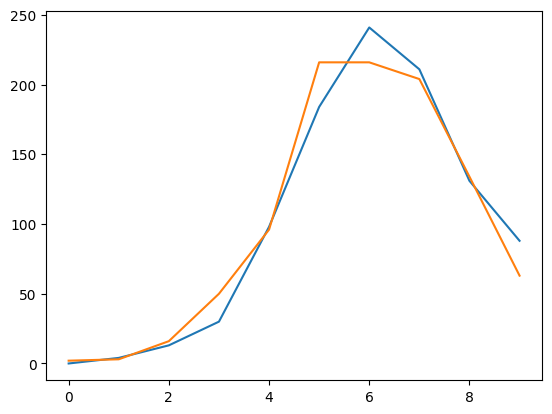

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as sps

data = pd.read_csv("/content/exams_dataset.csv")

alpha = 0.05
sample1 = data['writing score']
sample2 = data['math score']

left = min(sample1.min(),sample2.min())
right = max(sample1.max(),sample2.max())

k = int(1 + 3.3 * np.log10(len(sample1))) # число интервалов по формуле Старджеса
bins = np.linspace(left, right, k + 1)

freqs1 = np.histogram(sample1, bins=bins)[0]
freqs2 = np.histogram(sample2, bins=bins)[0]

rho = len(sample1) * len(sample2) * sum((1 / (freqs1 + freqs2)) * ((freqs1 / len(sample1) - freqs2 / len(sample2))) ** 2)
p_value = 1 - chi2.cdf(rho, df = k - 1)

print(f"Значение статистики хи-квадрат: {rho}")н
print(f"p_value = {p_value}")

if p_value <= alpha:
    print("принимаем H1")
else:
    print("Принимаем H0")

plt.plot(freqs1)
plt.plot(freqs2)
plt.show()

Проверить однородность результатов за письменную часть и математику любым критерием, используя готовую реализацию.

Статистика Манна-Уитни: 533095.0
p-value: 0.010367738272048647


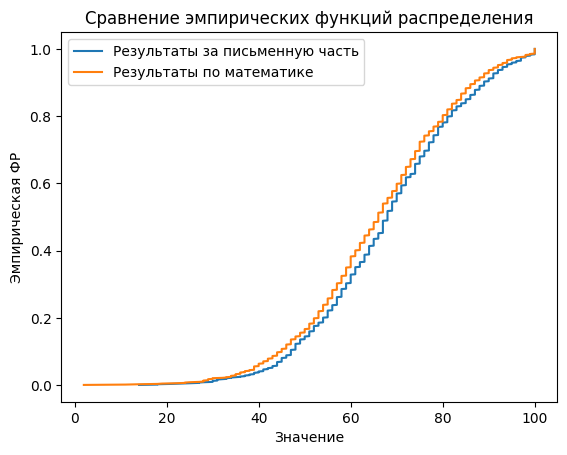

In [ ]:
from scipy.stats import mannwhitneyu
import seaborn as sns

# Вычисление статистики Манна-Уитни и p-value
statistic, p_value_mw = mannwhitneyu(sample1, sample2, alternative='two-sided')

alpha = 0.05

print("Статистика Манна-Уитни:", statistic)
print("p-value:", p_value_mw)

# Эмпирическая функция распределения
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_sample1, y_sample1 = ecdf(sample1)
x_sample2, y_sample2 = ecdf(sample2)

plt.plot(x_sample1, y_sample1, label='Результаты за письменную часть')
plt.plot(x_sample2, y_sample2, label='Результаты по математике')
plt.legend()
plt.xlabel('Значение')
plt.ylabel('Эмпирическая ФР')
plt.title('Сравнение эмпирических функций распределения')
plt.show()

## Задание 3
С помощью критерия независимости хи-квадрат проверить независимость наличия подготовительных курсов и суммарного результата трех экзаменов.

### Гипотезы

- $H_0$: Переменные X и Y независимы
- $H_1$: Переменные X и Y зависимы


####  Интервалы группировки

Введём:
- 2 интервала группировки $\Delta_1$ и $\Delta_2$ для значений $X$ и
- $m$ интервалов группировки $\nabla_1, \nabla_2, ..., \nabla_m$ для значений $Y$

####  Эмпирические частоты

$v_{ij} =$ число пар $(X_i, Y_i)$, попавших в $\Delta_i \times \nabla_j$

####  Частоты

- $v_i$ = число $X_i$, попавших в $\Delta_i$
- $v_j$ = число $Y_i$, попавших в $\nabla_j$


По формуле:
$$\rho(\overrightarrow{X}, \overrightarrow{Y}) = n\sum \limits_{i=1}^{2} \sum \limits_{j=1}^{k}\frac{(v_{ij}-\frac{(v_iv_j)}{n})^2}{v_iv_j}$$
где $n$ - общее количество наблюдений, $k$ - количество интервалов для переменной Y.



Статистика критерия: 69.32042346146555
Реально достигнутый уровень значимости критерия: 2.0691670599148893e-11
принимаем H1
Коэффициент корреляции Спирмена: 0.251001138526115
p-value критерия Спирмена: 7.835149871754302e-16


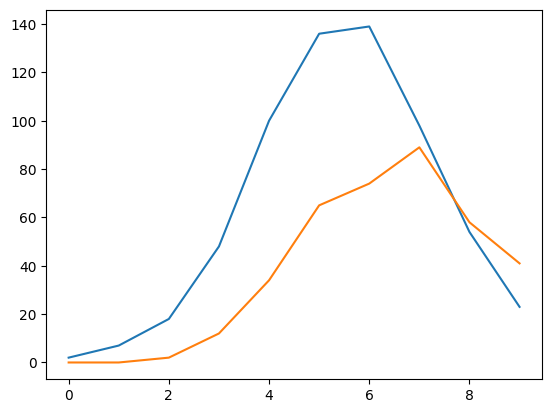

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt

data = pd.read_csv("/content/exams_dataset.csv")
alpha = 0.05

course = data["test preparation course"]
course_new = course.replace({'none': 0, 'completed': 1})

score = data['math score'] + data['reading score'] + data['writing score']
n = len(score)

k = int(1 + 3.3 * np.log10(n)) # число интервалов по формуле Старджеса
nabla = np.linspace(score.min(), score.max(), k + 1)

vij = np.zeros((2, k), dtype=int)
for i in range(n):
    for j in range(k):
        if j != k - 1:
            if nabla[j] <= score[i] < nabla[j + 1]:
                vij[course_new[i], j] += 1
        else:
            if nabla[j] <= score[i] <= nabla[j + 1]:
                vij[course_new[i], j] += 1

vi = np.array([np.sum(course_new == 0), np.sum(course_new == 1)])

vj = np.array([np.sum((score >= nabla[i]) & (score < nabla[i + 1])) for i in range(k)])

rho = 0
for i in range(2):
    for j in range(k):
        rho += (vij[i, j] - (vi[i] * vj[j]) / n) ** 2 / (vi[i] * vj[j])

rho *= n
print("Статистика критерия:", rho)

p_value_chi2 = 1 - sps.chi2.cdf(rho, df=k - 1)
print("Реально достигнутый уровень значимости критерия:", p_value_chi2)
if p_value_chi2 <= alpha:
    print("принимаем H1")
else:
    print("Принимаем H0")

# Решение с использованием критерия Спирмена
res = sps.spearmanr(score, course_new)
print("Коэффициент корреляции Спирмена:", res.correlation)
print("p-value критерия Спирмена:", res.pvalue)

plt.plot(vij[0])
plt.plot(vij[1])
plt.show()